# Versuch 256: Röntgenfluoreszenz

## Auswertung der Messergebnisse

In [103]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2

plt.style.use('classic')

#Plot settings
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

### Analyse der $K_\alpha$-Strahlung

In [34]:
#Kernladungszahl
Z=np.array([22,26,28,29,30,40,42,47])

#K_alpha in der Reihenfolge (Ti,Fe,Ni,Cu,Zn,Zr,Mo,Ag) in keV
K_alpha=np.array([4.45,6.40,7.50,8.08,8.68,15.82,17.48,21.97])
#Peakbreite
K_alpha_err=np.array([0.17,0.16,0.15,0.16,0.16,0.17,0.17,0.19])

#Wurzel aus K_alpha
sqrt_K_alpha=np.sqrt(K_alpha) 
sqrt_K_alpha_err=1/(2*np.sqrt(K_alpha))*K_alpha_err

In [97]:
#Fitfunktion und optimale Parameter

n1=1
n2=2

def fit_function(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2-1/n2**2)

popt1,pcov1=curve_fit(fit_function, Z, sqrt_K_alpha, sigma=sqrt_K_alpha_err )

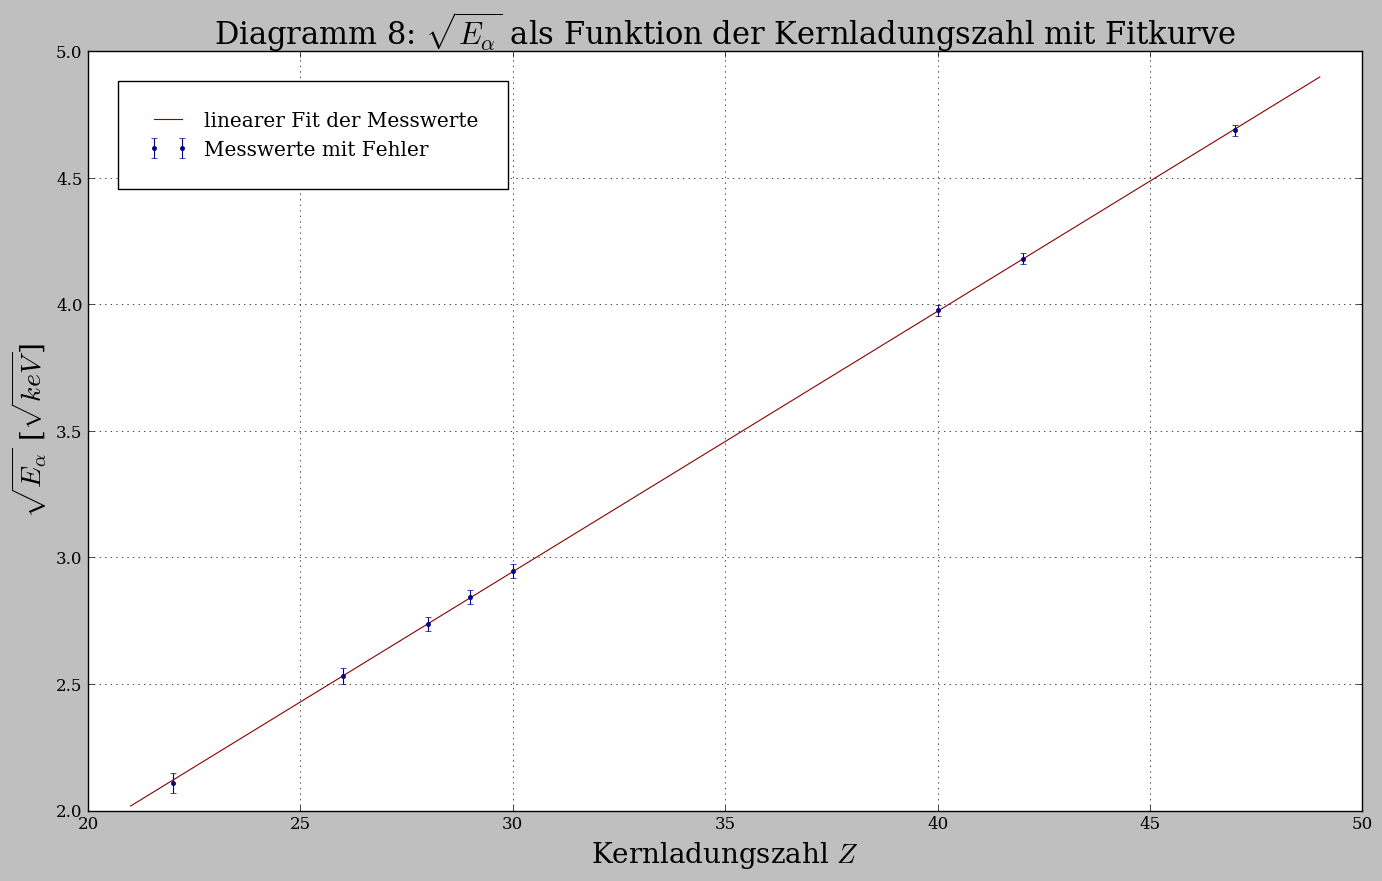

In [104]:
#Plot der Messdaten mit Fit
plt.errorbar(Z, sqrt_K_alpha, yerr=sqrt_K_alpha_err,linewidth=0.8,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(np.linspace(21,49,100),fit_function(np.linspace(21,49,100),*popt1),linewidth=0.8,color='darkred',label='linearer Fit der Messwerte')
plt.xlabel(r'Kernladungszahl $ Z$', size=20)
plt.ylabel(r'$\sqrt{E_\alpha} $ [$ \sqrt{keV}$]', size=20)
plt.title(r'Diagramm 8: $\sqrt{E_\alpha}$ als Funktion der Kernladungszahl mit Fitkurve', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V256Diagramm8.pdf', format='PDF')

In [88]:
#Güte des Fits 
chi_squared1=np.sum((fit_function(Z,*popt1)-sqrt_K_alpha)**2/sqrt_K_alpha_err**2)

#Freiheitsgrade
dof1=len(Z)-2

chi_squared1_red=chi_squared1/dof1

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared1))
print('chi_squared_red= ' + str(chi_squared1_red))
print()

#Fitwahrscheinlichkeit
prob1=round(1-chi2.cdf(chi_squared1,dof1),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob1) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 0.237075686196
chi_squared_red= 0.039512614366

Die Fitwahrscheinlichkeit beträgt: 100.0 %


In [89]:
#Ausgabe der Fitparameter
print('Aus dem Fit der Messwerte erhalten wir:')
print('sqrt_E = (' + str(popt1[0]) + ' +/- ' + str(pcov1[0,0]**0.5) + ') sqrt(keV)')
print('sigma12 = (' + str(popt1[1]) + ' +/- ' + str(pcov1[1,1]**0.5) + ')')

Aus dem Fit der Messwerte erhalten wir:
sqrt_E = (0.118813389567 +/- 0.000251593713307) sqrt(keV)
sigma12 = (1.39138389606 +/- 0.0758968591715)


In [90]:
#Bestimmung von E_R
E_R_alpha=popt1[0]**2*1e3
E_R_alpha_err=2*popt1[0]*pcov1[0,0]**0.5*1e3

print('Wir erhalten für die Rydberg-Energie in eV:')
print('E_R = (' + str(E_R_alpha) + ' +/- ' + str(E_R_alpha_err) + ') eV' )

Wir erhalten für die Rydberg-Energie in eV:
E_R = (14.1166215404 +/- 0.0597854037434) eV


##### Vergleich der Ergebnisse mit der Literatur

In [114]:
#Aus Wikipedia: 
sigma12_lit1=1.0

#Rydberg-Konstante
E_R_lit=13.605693005 #eV
E_R_lit_err=0.000000084 #eV

diff_sigma1=np.abs(sigma12_lit1-popt1[1])

diff_E_R1=np.abs(E_R_lit-E_R_alpha)
diff_E_R1_err=np.sqrt((E_R_lit_err)**2+E_R_alpha_err**2)

print('Der Vergleich mit den Literaturwerten liefert:')
print('∆sigma12_1 = (' + str(diff_sigma1) + ' +/- ' + str(pcov1[1,1]**0.5) + '), sigma = ' + str(diff_sigma1/pcov1[1,1]**0.5))
print('∆E_R1 = (' + str(diff_E_R1) + ' +/- ' + str(diff_E_R1_err) + ') eV, sigma = ' + str(diff_E_R1/diff_E_R1_err))

Der Vergleich mit den Literaturwerten liefert:
∆sigma12_1 = (0.391383896056 +/- 0.0758968591715), sigma = 5.15678646427
∆E_R1 = (0.510928535367 +/- 0.0597854037435) eV, sigma = 8.54604139765


### Analyse der $K_\beta$-Strahlung

In [77]:
#K_beta in der Reihenfolge (Ti,Fe,Ni,Cu,Zn,Zr,Mo,Ag) in keV
K_beta=np.array([4.95,7.07,8.29,8.95,9.63,17.70,19.58,24.65])
#Peakbreite
K_beta_err=np.array([0.11,0.15,0.16,0.16,0.17,0.19,0.17,0.15])

#Wurzel aus K_alpha
sqrt_K_beta=np.sqrt(K_beta)
sqrt_K_beta_err=1/(2*np.sqrt(K_beta))*K_beta_err

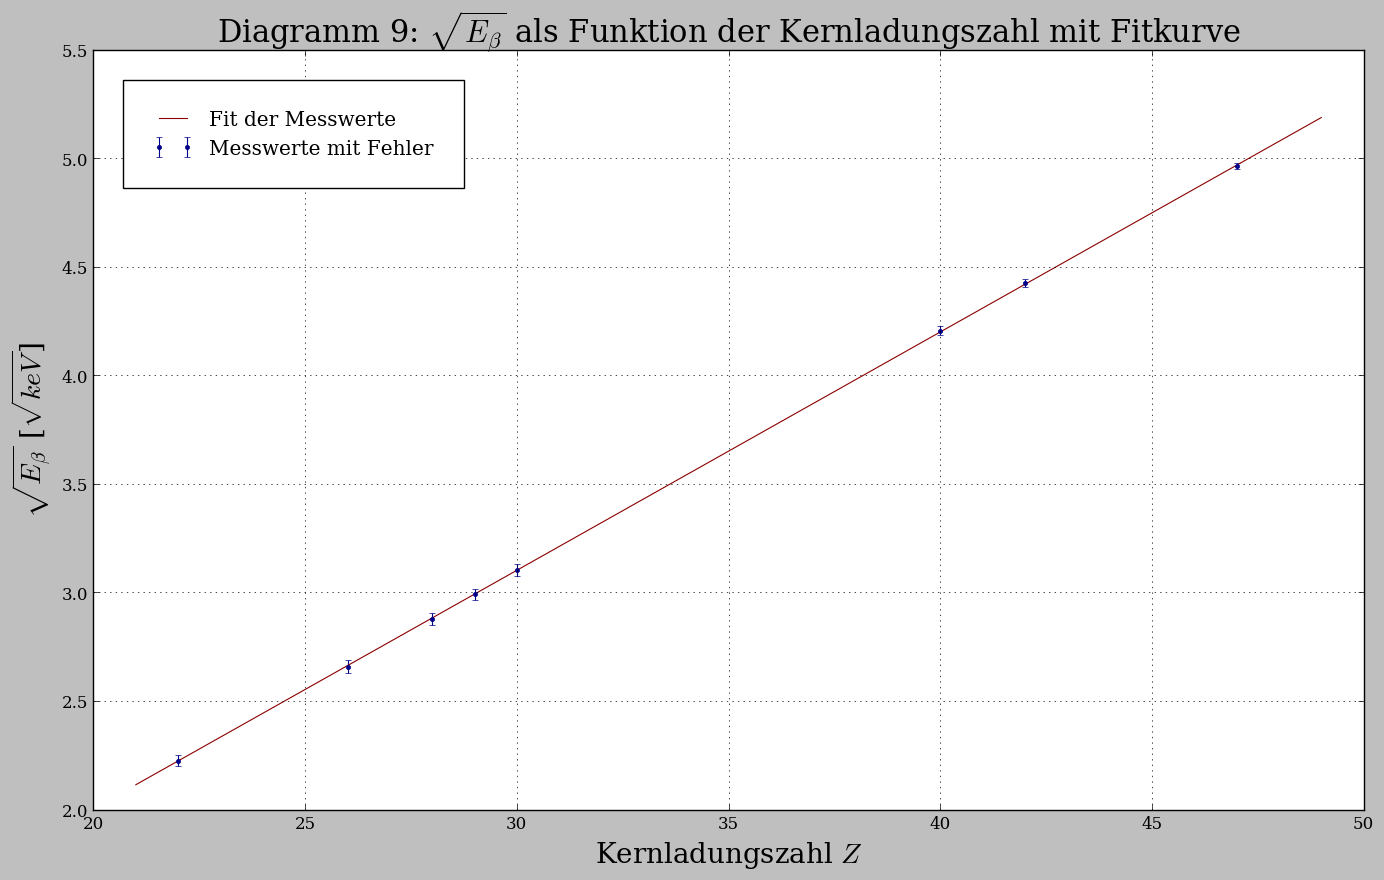

In [96]:
#Fit der Daten
n2=3
popt2,pcov2=curve_fit(fit_function, Z, sqrt_K_beta, sigma=sqrt_K_beta_err )

#Plot der Messdaten mit Fit
plt.errorbar(Z, sqrt_K_beta, yerr=sqrt_K_beta_err,linewidth=0.8,linestyle=' ',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(np.linspace(21,49,100),fit_function(np.linspace(21,49,100),*popt2),linewidth=0.8,color='darkred',label='Fit der Messwerte')
plt.xlabel(r'Kernladungszahl $ Z$', size=20)
plt.ylabel(r'$\sqrt{E_\beta}$ [$\sqrt{keV}$]', size=20)
plt.title(r'Diagramm 9: $\sqrt{E_\beta}$ als Funktion der Kernladungszahl mit Fitkurve', size=22)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V256Diagramm9.pdf', format='PDF')

In [83]:
#Güte des Fits
chi_squared2=np.sum((fit_function(Z,*popt2)-sqrt_K_beta)**2/sqrt_K_beta_err**2)

#Freiheitsgrade
dof2=len(Z)-2

chi_squared2_red=chi_squared2/dof2

print('Wir erhalten die nachfolgenden Werte für die Güte des Fits:')
print('chi_squared= ' + str(chi_squared2))
print('chi_squared_red= ' + str(chi_squared2_red))
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100

print('Die Fitwahrscheinlichkeit beträgt: ' + str(prob2) + ' %')

Wir erhalten die nachfolgenden Werte für die Güte des Fits:
chi_squared= 0.271864423175
chi_squared_red= 0.0453107371958

Die Fitwahrscheinlichkeit beträgt: 100.0 %


In [84]:
#Ausgabe der Fitparameter
print('Aus dem Fit der Messwerte erhalten wir:')
print('sqrt_E = (' + str(popt2[0]) + ' +/- ' + str(pcov2[0,0]**0.5) + ') sqrt(keV)')
print('sigma12 = (' + str(popt2[1]) + ' +/- ' + str(pcov2[1,1]**0.5) + ')')

Aus dem Fit der Messwerte erhalten wir:
sqrt_E = (0.116466801369 +/- 0.000197995898557) sqrt(keV)
sigma12 = (1.74703531486 +/- 0.0611110039096)


In [85]:
#Bestimmung von E_R
E_R_beta=popt2[0]**2*1e3
E_R_beta_err=2*popt2[0]*pcov2[0,0]**0.5*1e3

print('Wir erhalten für die Rydberg-Energie in eV:')
print('E_R = (' + str(E_R_beta) + ' +/- ' + str(E_R_beta_err) + ') eV' )

Wir erhalten für die Rydberg-Energie in eV:
E_R = (13.5645158212 +/- 0.0461198979784) eV


##### Vergleich der Ergebnisse mit der Literatur

In [112]:
#Aus Wikipedia: 
sigma12_lit2=1.8

diff_sigma2=np.abs(sigma12_lit1-popt2[1])

diff_E_R2=np.abs(E_R_lit-E_R_beta)
diff_E_R2_err=np.sqrt((E_R_lit_err)**2+E_R_beta_err**2)

print('Der Vergleich mit den Literaturwerten liefert:')
print('∆sigma12_1 = (' + str(diff_sigma2) + ' +/- ' + str(pcov1[1,1]**0.5) + ')')
print('∆E_R1 = (' + str(diff_E_R2) + ' +/- ' + str(diff_E_R2_err) + ') eV')

Der Vergleich mit den Literaturwerten liefert:
∆sigma12_1 = (0.747035314857 +/- 0.0758968591715)
∆E_R1 = (0.0411771837605 +/- 0.0461198979784) eV
